# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Muhammad Ardiansyah]
- **Email:** [ardiansyhmmd@gmail.com]
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Bagaimana perkembangan penyewaan sepeda dari waktu ke waktu berdasarkan data harian?
- Bagaimana perbandingan penggunaan sepeda pada hari libur dan hari biasa?
- Apakah orang lebih cenderung menggunakan sepeda pada suhu tertentu?

## Import Semua Packages/Library yang Digunakan

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [225]:
day_bike_df = pd.read_csv("data/day.csv")
day_bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [226]:
hour_bike_df = pd.read_csv("data/hour.csv")
hour_bike_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [227]:
day_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Tidak terdapat missing value akan tetapi terdapat kesalahan type data untuk column **dteday**
yang seharusnya type data tersebut adalah ***datetime***



In [228]:
hour_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Sama halnya seperti data day_bike_df terdapat kesalahan type data untuk column **dteday**
yang seharusnya type data tersebut adalah ***datetime***



Melakukan pengecekan duplikasi data

In [229]:
print("Jumlah duplikasi: ", day_bike_df.duplicated().sum())
print("Jumlah duplikasi: ", hour_bike_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


Kedua data di atas tidak menunjukkan adanya duplikasi data

Periksa parameter statistik apakah terdapat ***inaccurate value***?

In [230]:
day_bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [231]:
hour_bike_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Penanganan kesalahan type data

In [232]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_bike_df[column] = pd.to_datetime(day_bike_df[column])
  hour_bike_df[column] = pd.to_datetime(hour_bike_df[column])


In [233]:
day_bike_df.info()
hour_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Berdasarkan penanganan diatas type data sudah benar dengan menggunakan ***datetime*** pada column **dteday**
untuk kedua table

## Exploratory Data Analysis (EDA)

### Explore Data day_bike_df

In [234]:
day_bike_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


### Explore Data hour_bike_df

In [235]:
hour_bike_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


#### Explore Data day_bike_df and hour_bike_df


In [236]:
all_bike_df = pd.merge(
    left=day_bike_df,
    right=hour_bike_df,
    how="left",
    left_on="dteday",
    right_on="dteday"
)
all_bike_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [237]:
days_category = {
    1: 'Hari Liburan',
    2: 'Hari Biasa',
    3: 'Hari Kerja',
}

all_bike_df['days_category'] = all_bike_df['season_x'].map(days_category)

In [238]:
all_bike_df.groupby('days_category')['cnt_x'].mean().reset_index().sort_values('cnt_x')

,days_category,cnt_x
2,Hari Liburan,2635.348185
0,Hari Biasa,4995.253119
1,Hari Kerja,5654.093194


## Visualization & Explanatory Analysis

### Bagaimana perkembangan penyewaan sepeda dari waktu ke waktu berdasarkan data harian?

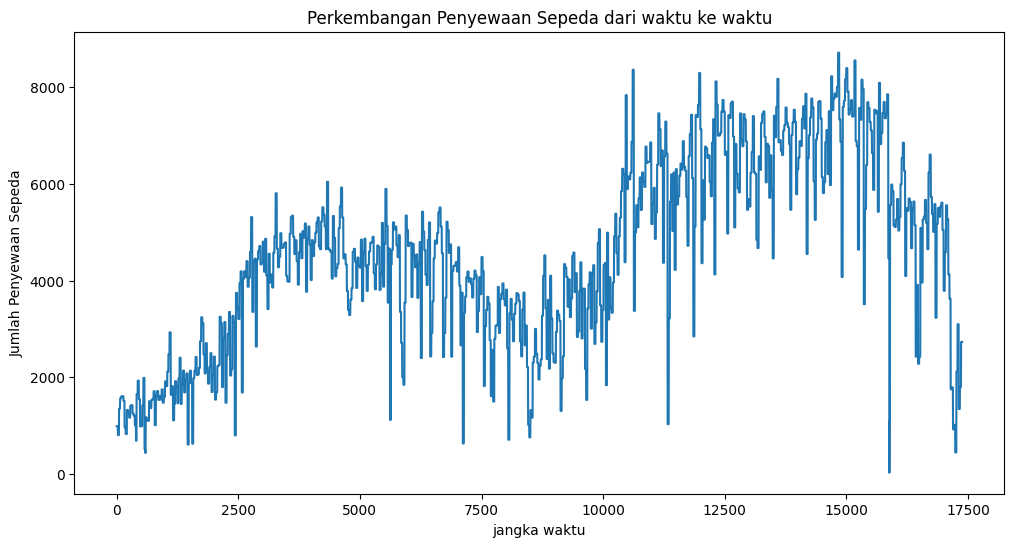

In [239]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=all_bike_df, x=all_bike_df.index, y='cnt_x')
plt.title('Perkembangan Penyewaan Sepeda dari waktu ke waktu')
plt.xlabel('jangka waktu')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

### Bagaimana perbandingan penggunaan sepeda pada hari liburan, hari biasa, dan hari kerja?

Text(0.5, 1.0, 'Perbandingan Jumlah Penggunaan Sepeda Berdasarkan Jenis Hari')

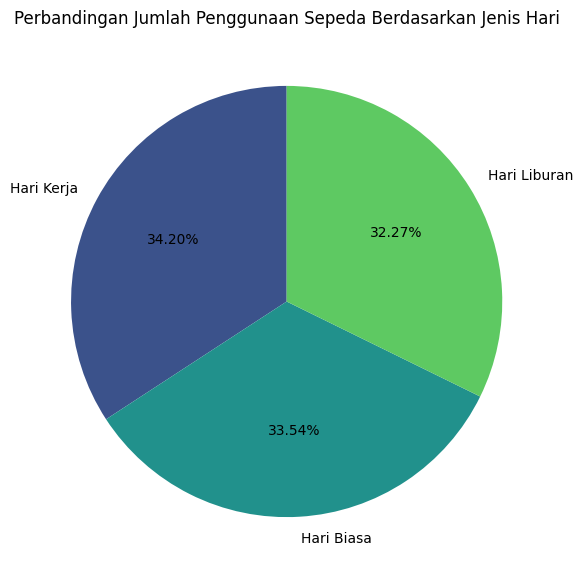

In [240]:
plt.figure(figsize=(7, 7))

comparison = all_bike_df['days_category'].value_counts()
plt.pie(comparison, labels=comparison.index, autopct='%2.2f%%', startangle=90, colors=sns.color_palette('viridis', len(comparison)))
plt.title('Perbandingan Jumlah Penggunaan Sepeda Berdasarkan Jenis Hari')

### Apakah orang lebih cenderung menggunakan sepeda pada suhu tertentu?

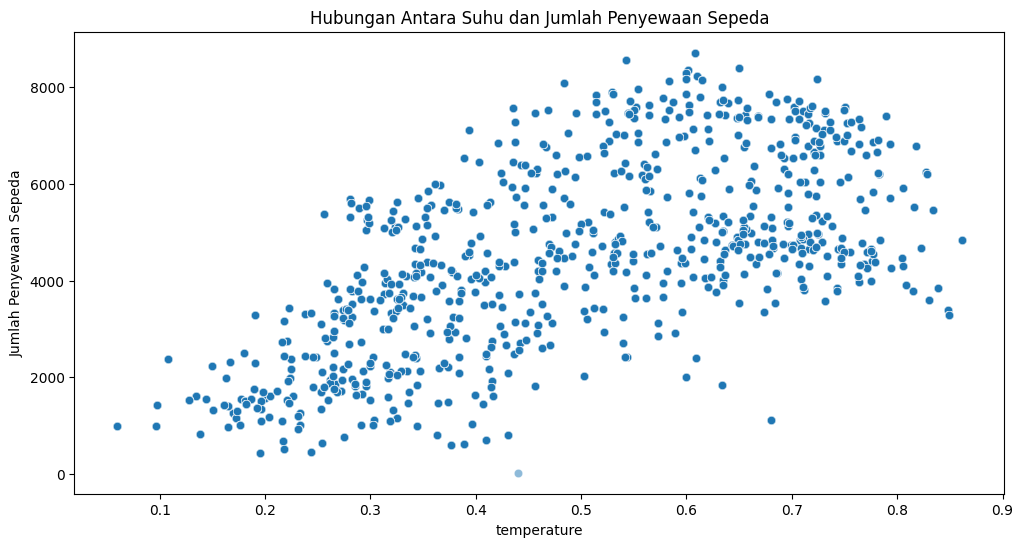

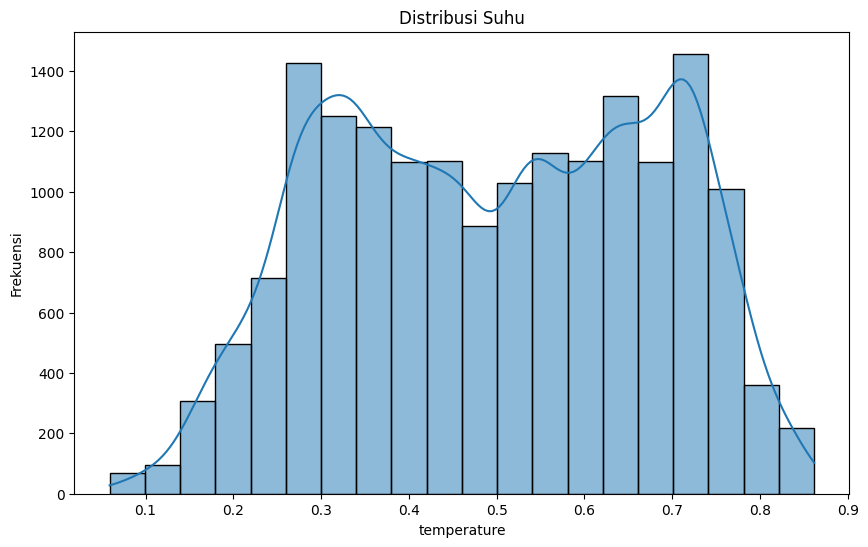

In [241]:
# Plot scatter plot untuk mengeksplor hubungan antara suhu (temp_x) dan jumlah penyewaan sepeda (cnt_x)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=all_bike_df, x='temp_x', y='cnt_x', alpha=0.5)
plt.title('Hubungan Antara Suhu dan Jumlah Penyewaan Sepeda')
plt.xlabel('temperature')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

# Plot distribusi suhu menggunakan histogram
plt.figure(figsize=(10, 6))
sns.histplot(all_bike_df['temp_x'], bins=20, kde=True)
plt.title('Distribusi Suhu')
plt.xlabel('temperature')
plt.ylabel('Frekuensi')
plt.show()

In [242]:
all_bike_df.to_csv("all_bike_df.csv", index=False)

## Conclusion

<details>

<summary>1.Bagaimana perkembangan penyewaan sepeda dari waktu ke waktu berdasarkan data harian?</summary>

***Conclusion***

Berdasarkan grafik pada pertanyaan no 1 dapat dilihat bahwa perkembangan penyewaan sepeda tersebut dari tahun 2011 bulan Januari mengalami fluktuasi naik turun hingga Januari 2013



</details>

<details>

<summary>2.Bagaimana perbandingan penggunaan sepeda pada hari liburan, hari biasa, dan hari kerja?</summary>

***Conclusion***

Berdasarkan grafik pada pertanyaan no 2, tidak terdapat perbedaan yang sangat signifikan
antara penyewa sepeda di hari liburan, hari biasa, dan dari kerja. Berdasarkan pie chart
dapat  disimpulkan bahwa jumlah  penyewa sepeda di hari kerja  adalah yang paling banyak, dan
jumlah penyewa sepeda di hari libur adalah  yang paling sedikit.



</details>

<details>

<summary>3. Apakah orang lebih cenderung menggunakan sepeda pada suhu tertentu?</summary>

***Conclusion***

Berdasarkan visualisasi data pada pertanyaan no 3, terlihat adanya kecenderungan bahwa ketika suhu meningkat, jumlah penyewaan sepeda juga cenderung meningkat. Ini menunjukkan adanya korelasi positif antara suhu dan aktivitas penyewaan sepeda. Melalui histogram distribusi suhu, dapat diamati sebaran suhu yang digunakan dalam dataset. 



</details>